##**Objective:**

The aim of this data analysis project is to uncover insights into the influenza outbreak in New York State during the initial months of the 2023-2024 season, specifically from October to December 2023. The analysis will utilize two primary datasets retrieved from HEALTH.DATA.NY.GOV: 'Influenza Laboratory-Confirmed Cases by Age Group: Beginning the 2023-24 Season' and 'Influenza Hospitalizations: Beginning October 2020.'

##**Step 1: Imports**



###**Import packages and libraries**

Before getting started, we will need to import all the required libraries and extensions.




In [1]:
import pandas as pd
import matplotlib.pyplot as plt

###**Load the dataset into a DataFrame**


Load the data from two CSV files into separate DataFrames to analyze laboratory-confirmed influenza cases and influenza-related hospitalizations in the counties of New York State.

In [2]:
flu_cases = pd.read_csv('Influenza_Laboratory-Confirmed_Cases_by_Age_Group__Beginning_2023-24_Season.csv')

In [3]:
flu_hospitalizations = pd.read_csv('Influenza_Hospitalizations__Beginning_October_2020.csv')

##**Step 2a: Data Exploration (Initial EDA and Data Cleaning) for Influenza Laboratory Confirmed Cases**

###**Display the first 10 rows of the data**

Get an understanding of how the dataset is structured.

In [4]:
flu_cases.head(10)

,Season,Region,County,CDC Week,Week Ending Date,Age Group,Count,Centroid,FIPS
0,2023-2024,CAPITAL DISTRICT,ALBANY,40,10/07/2023,0-4,1,"(42.5882713, -73.9740136)",36001
1,2023-2024,CAPITAL DISTRICT,ALBANY,40,10/07/2023,5-17,2,"(42.5882713, -73.9740136)",36001
2,2023-2024,CAPITAL DISTRICT,ALBANY,40,10/07/2023,18-49,2,"(42.5882713, -73.9740136)",36001
3,2023-2024,CAPITAL DISTRICT,ALBANY,40,10/07/2023,50-64,0,"(42.5882713, -73.9740136)",36001
4,2023-2024,CAPITAL DISTRICT,ALBANY,40,10/07/2023,65+,3,"(42.5882713, -73.9740136)",36001
5,2023-2024,CAPITAL DISTRICT,ALBANY,40,10/07/2023,UNKNOWN,0,"(42.5882713, -73.9740136)",36001
6,2023-2024,CAPITAL DISTRICT,ALBANY,41,10/14/2023,0-4,0,"(42.5882713, -73.9740136)",36001
7,2023-2024,CAPITAL DISTRICT,ALBANY,41,10/14/2023,5-17,1,"(42.5882713, -73.9740136)",36001
8,2023-2024,CAPITAL DISTRICT,ALBANY,41,10/14/2023,18-49,2,"(42.5882713, -73.9740136)",36001
9,2023-2024,CAPITAL DISTRICT,ALBANY,41,10/14/2023,50-64,1,"(42.5882713, -73.9740136)",36001


###**Assess the size of the dataset**

Get a sense of how large the dataset is.

In [5]:
flu_cases.size

43524

The dataset contains a total of 43,524 values.

###**Determine the shape of the dataset**

Identify the number of rows and columns in the dataset.

In [6]:
flu_cases.shape

(4836, 9)

The dataset has a shape of (4836, 9), where 4836 is the number of rows (entries) and 9 is the number of columns

###**Get basic information about the dataset**

To further understand what the dataset entails, get basic information about the dataset, including the data type of values in each column.

In [7]:
flu_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4836 entries, 0 to 4835
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season            4836 non-null   object
 1   Region            4836 non-null   object
 2   County            4836 non-null   object
 3   CDC Week          4836 non-null   int64 
 4   Week Ending Date  4836 non-null   object
 5   Age Group         4836 non-null   object
 6   Count             4836 non-null   int64 
 7   Centroid          4836 non-null   object
 8   FIPS              4836 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 340.2+ KB


###**Rename columns**

Rename the columns as needed.

In [8]:
flu_cases.rename(columns={'Count': 'Case Count', 'Centroid': 'Coordinate'}, inplace=True)

###**Check missing values**


Check for any missing values in the data.

In [9]:
flu_cases.isnull().sum()

Season              0
Region              0
County              0
CDC Week            0
Week Ending Date    0
Age Group           0
Case Count          0
Coordinate          0
FIPS                0
dtype: int64

The dataset does not contain any missing values.

###**Remove entries where Case Count is 0**

In [10]:
flu_cases = flu_cases[flu_cases['Case Count'] != 0].reset_index(drop=True)

In [11]:
# Check that there are no entries with Case Count = 0
assert (flu_cases['Case Count'] == 0).sum() == 0, "Error: There are still entries with Case Count = 0 after removal."
print("Assertion passed. Removal of entries where Case Count is 0 is successful.")

Assertion passed. Removal of entries where Case Count is 0 is successful.


In [12]:
flu_cases.shape

(2681, 9)

###**Remove entries where Age Group is UNKNOWN**

In [13]:
flu_cases = flu_cases[flu_cases['Age Group'] != 'UNKNOWN'].reset_index(drop=True)

In [14]:
# Check that there are no entries with Age Group = UNKNOWN
assert (flu_cases['Age Group'] == 'UNKNOWN').sum() == 0, "Error: There are still entries with Age Group = UNKNOWN after removal."
print("Assertion passed. Removal of entries where Age Group is UNKNOWN is successful.")

Assertion passed. Removal of entries where Age Group is UNKNOWN is successful.


In [15]:
flu_cases.shape

(2672, 9)

###**Check for duplicates**


Check for duplicate entries in the data and remove them

In [16]:
flu_cases.duplicated().sum()

0

The dataset does not contain any duplicate entries.

##**Step 2b: Data Exploration (Initial EDA and Data Cleaning) for Influenza Hospitalizations**

###**Display the first 10 rows of the data**

Get an understanding of how the dataset is structured.

In [17]:
flu_hospitalizations.head(10)

,Season,Region,County,CDC Week,Week Ending Date,Count,Age Group
0,2020 - 2021,CAPITAL DISTRICT,ALBANY,41,10/10/2020,0,0-4
1,2020 - 2021,CAPITAL DISTRICT,ALBANY,41,10/10/2020,0,5-17
2,2020 - 2021,CAPITAL DISTRICT,ALBANY,41,10/10/2020,0,18-49
3,2020 - 2021,CAPITAL DISTRICT,ALBANY,41,10/10/2020,0,50-64
4,2020 - 2021,CAPITAL DISTRICT,ALBANY,41,10/10/2020,0,65+
5,2020 - 2021,CAPITAL DISTRICT,ALBANY,42,10/17/2020,0,0-4
6,2020 - 2021,CAPITAL DISTRICT,ALBANY,42,10/17/2020,0,5-17
7,2020 - 2021,CAPITAL DISTRICT,ALBANY,42,10/17/2020,0,18-49
8,2020 - 2021,CAPITAL DISTRICT,ALBANY,42,10/17/2020,0,50-64
9,2020 - 2021,CAPITAL DISTRICT,ALBANY,42,10/17/2020,0,65+


###**Assess the size of the dataset**

Get a sense of how large the dataset is.

In [18]:
flu_hospitalizations.size

234010

The dataset contains a total of 234,010 values.

###**Determine the shape of the dataset**

Identify the number of rows and columns in the dataset.

In [19]:
flu_hospitalizations.shape

(33430, 7)

The dataset has a shape of (33430, 7), where 33430 is the number of rows (entries) and 7 is the number of columns.

###**Get basic information about the dataset**

To further understand what the dataset entails, get basic information about the dataset, including the data type of values in each column.

In [20]:
flu_hospitalizations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33430 entries, 0 to 33429
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season            33430 non-null  object
 1   Region            33430 non-null  object
 2   County            33430 non-null  object
 3   CDC Week          33430 non-null  int64 
 4   Week Ending Date  33430 non-null  object
 5   Count             33430 non-null  int64 
 6   Age Group         33430 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.8+ MB


###**Rename columns**

Rename the columns as needed.

In [21]:
flu_hospitalizations.rename(columns={'Count': 'Hospitalization Count'}, inplace=True)

###**Check missing values**


Check for any missing values in the data.

In [22]:
flu_hospitalizations.isnull().sum()

Season                   0
Region                   0
County                   0
CDC Week                 0
Week Ending Date         0
Hospitalization Count    0
Age Group                0
dtype: int64

The dataset does not contain any missing values.

###**Remove spaces in the Season column**

In [23]:
flu_hospitalizations['Season'] = flu_hospitalizations['Season'].str.replace(' - ', '-')
flu_hospitalizations

,Season,Region,County,CDC Week,Week Ending Date,Hospitalization Count,Age Group
0,2020-2021,CAPITAL DISTRICT,ALBANY,41,10/10/2020,0,0-4
1,2020-2021,CAPITAL DISTRICT,ALBANY,41,10/10/2020,0,5-17
2,2020-2021,CAPITAL DISTRICT,ALBANY,41,10/10/2020,0,18-49
3,2020-2021,CAPITAL DISTRICT,ALBANY,41,10/10/2020,0,50-64
4,2020-2021,CAPITAL DISTRICT,ALBANY,41,10/10/2020,0,65+
...,...,...,...,...,...,...,...
33425,2023-2024,WESTERN,YATES,52,12/30/2023,0,0-4
33426,2023-2024,WESTERN,YATES,52,12/30/2023,0,5-17
33427,2023-2024,WESTERN,YATES,52,12/30/2023,0,18-49
33428,2023-2024,WESTERN,YATES,52,12/30/2023,0,50-64


In [24]:
# Check that the modification is successful
expected_result = flu_hospitalizations['Season'].apply(lambda x: x.replace(' - ', '-'))
assert (flu_hospitalizations['Season'] == expected_result).all(), "Removal of spaces was not successful"
print("Assertion passed. Removal of spaces is successful.")

Assertion passed. Removal of spaces is successful.


###**Remove entries where Hospitalization Count is 0**

In [25]:
flu_hospitalizations = flu_hospitalizations[flu_hospitalizations['Hospitalization Count'] != 0].reset_index(drop=True)

In [26]:
# Check that there are no entries with Hospitalization Count = 0
assert (flu_hospitalizations['Hospitalization Count'] == 0).sum() == 0, "Error: There are still entries with Hospitalization Count = 0 after removal."
print("Assertion passed. Removal of entries where Hospitalization Count is 0 is successful.")

Assertion passed. Removal of entries where Hospitalization Count is 0 is successful.


In [27]:
flu_hospitalizations.shape

(6052, 7)

###**Remove entries where Season is not 2023-2024**

In [28]:
flu_hospitalizations = flu_hospitalizations[flu_hospitalizations['Season'] == '2023-2024'].reset_index(drop=True)

In [29]:
# Check that there are no entries with Season = 2020-2021
assert (flu_hospitalizations['Season'] == '2020-2021').sum() == 0, "Error: There are still entries with Season = 2020-2021 after removal."
# Check that there are no entries with Season = 2021-2022
assert (flu_hospitalizations['Season'] == '2021-2022').sum() == 0, "Error: There are still entries with Season = 2021-2022 after removal."
# Check that there are no entries with Season = 2022-2023
assert (flu_hospitalizations['Season'] == '2022-2023').sum() == 0, "Error: There are still entries with Season = 2022-2023 after removal."
print("Assertion passed. Removal of entries where Season is not 2023-2024 is successful.")

Assertion passed. Removal of entries where Season is not 2023-2024 is successful.


In [30]:
flu_hospitalizations.shape

(949, 7)

###**Check for duplicates**


Check for duplicate entries in the data and remove them.

In [31]:
flu_hospitalizations.duplicated().sum()

0

The dataset does not contain any duplicate entries.

##**Step 2c: Data Exploration (Merging Data Frames)**

###**Merge the two data frames**

In [32]:
flu_data = pd.merge(flu_cases, flu_hospitalizations, on=['Season', 'Region', 'County', 'CDC Week', 'Week Ending Date', 'Age Group'], how='left')
flu_data

,Season,Region,County,CDC Week,Week Ending Date,Age Group,Case Count,Coordinate,FIPS,Hospitalization Count
0,2023-2024,CAPITAL DISTRICT,ALBANY,40,10/07/2023,0-4,1,"(42.5882713, -73.9740136)",36001,NaN
1,2023-2024,CAPITAL DISTRICT,ALBANY,40,10/07/2023,5-17,2,"(42.5882713, -73.9740136)",36001,NaN
2,2023-2024,CAPITAL DISTRICT,ALBANY,40,10/07/2023,18-49,2,"(42.5882713, -73.9740136)",36001,NaN
3,2023-2024,CAPITAL DISTRICT,ALBANY,40,10/07/2023,65+,3,"(42.5882713, -73.9740136)",36001,1.0
4,2023-2024,CAPITAL DISTRICT,ALBANY,41,10/14/2023,5-17,1,"(42.5882713, -73.9740136)",36001,NaN
...,...,...,...,...,...,...,...,...,...,...
2667,2023-2024,NYC,RICHMOND,52,12/30/2023,0-4,84,"(40.5795, -74.1502)",36085,3.0
2668,2023-2024,NYC,RICHMOND,52,12/30/2023,5-17,137,"(40.5795, -74.1502)",36085,1.0
2669,2023-2024,NYC,RICHMOND,52,12/30/2023,18-49,199,"(40.5795, -74.1502)",36085,6.0
2670,2023-2024,NYC,RICHMOND,52,12/30/2023,50-64,111,"(40.5795, -74.1502)",36085,17.0


###**Fill NaN values with 0 for the Hospitalization Count column**

In [33]:
flu_data['Hospitalization Count'] = flu_data['Hospitalization Count'].fillna(0)
flu_data

,Season,Region,County,CDC Week,Week Ending Date,Age Group,Case Count,Coordinate,FIPS,Hospitalization Count
0,2023-2024,CAPITAL DISTRICT,ALBANY,40,10/07/2023,0-4,1,"(42.5882713, -73.9740136)",36001,0.0
1,2023-2024,CAPITAL DISTRICT,ALBANY,40,10/07/2023,5-17,2,"(42.5882713, -73.9740136)",36001,0.0
2,2023-2024,CAPITAL DISTRICT,ALBANY,40,10/07/2023,18-49,2,"(42.5882713, -73.9740136)",36001,0.0
3,2023-2024,CAPITAL DISTRICT,ALBANY,40,10/07/2023,65+,3,"(42.5882713, -73.9740136)",36001,1.0
4,2023-2024,CAPITAL DISTRICT,ALBANY,41,10/14/2023,5-17,1,"(42.5882713, -73.9740136)",36001,0.0
...,...,...,...,...,...,...,...,...,...,...
2667,2023-2024,NYC,RICHMOND,52,12/30/2023,0-4,84,"(40.5795, -74.1502)",36085,3.0
2668,2023-2024,NYC,RICHMOND,52,12/30/2023,5-17,137,"(40.5795, -74.1502)",36085,1.0
2669,2023-2024,NYC,RICHMOND,52,12/30/2023,18-49,199,"(40.5795, -74.1502)",36085,6.0
2670,2023-2024,NYC,RICHMOND,52,12/30/2023,50-64,111,"(40.5795, -74.1502)",36085,17.0


###**Convert Hospitalization Count to integers**

In [34]:
# Convert the float column to integers
flu_data['Hospitalization Count'] = flu_data['Hospitalization Count'].astype(int)

###**Change the order of the columns so that the Hospitalization Count is next to Case Count**

In [35]:
flu_data = flu_data[['Season', 'Region', 'County', 'CDC Week', 'Week Ending Date', 'Age Group', 'Case Count', 'Hospitalization Count', 'Coordinate', 'FIPS']]
flu_data

,Season,Region,County,CDC Week,Week Ending Date,Age Group,Case Count,Hospitalization Count,Coordinate,FIPS
0,2023-2024,CAPITAL DISTRICT,ALBANY,40,10/07/2023,0-4,1,0,"(42.5882713, -73.9740136)",36001
1,2023-2024,CAPITAL DISTRICT,ALBANY,40,10/07/2023,5-17,2,0,"(42.5882713, -73.9740136)",36001
2,2023-2024,CAPITAL DISTRICT,ALBANY,40,10/07/2023,18-49,2,0,"(42.5882713, -73.9740136)",36001
3,2023-2024,CAPITAL DISTRICT,ALBANY,40,10/07/2023,65+,3,1,"(42.5882713, -73.9740136)",36001
4,2023-2024,CAPITAL DISTRICT,ALBANY,41,10/14/2023,5-17,1,0,"(42.5882713, -73.9740136)",36001
...,...,...,...,...,...,...,...,...,...,...
2667,2023-2024,NYC,RICHMOND,52,12/30/2023,0-4,84,3,"(40.5795, -74.1502)",36085
2668,2023-2024,NYC,RICHMOND,52,12/30/2023,5-17,137,1,"(40.5795, -74.1502)",36085
2669,2023-2024,NYC,RICHMOND,52,12/30/2023,18-49,199,6,"(40.5795, -74.1502)",36085
2670,2023-2024,NYC,RICHMOND,52,12/30/2023,50-64,111,17,"(40.5795, -74.1502)",36085


In [36]:
flu_data.to_csv("NYS_Influenza_Data_Oct_to_Dec_2023.csv", index=False)

##**Step 3: Data Exploration (Analysis and Visualizations)**

###**Get the start and end dates of the dataset**

In [37]:
# Convert 'Week Ending Date' to datetime format
flu_data['Week Ending Date'] = pd.to_datetime(flu_data['Week Ending Date'])

start_date = (flu_data['Week Ending Date'].min() - pd.DateOffset(days=6)).strftime('%m/%d/%Y')
end_date = (flu_data['Week Ending Date'].max()).strftime('%m/%d/%Y')

print(f"Start Date: {start_date}")
print(f"End Date: {end_date}")

Start Date: 10/01/2023
End Date: 12/30/2023


The dataset includes the period from the beginning of October to the end of December 2023.

###**Get the total number of cases, total number of hospitalizations, average cases per week, average hospitalizations per week**

In [38]:
# Calculate total number of cases
total_cases = flu_data['Case Count'].sum()

# Calculate total number of hospitalizations
total_hospitalizations = flu_data['Hospitalization Count'].sum()

# Find average cases per week and average hospitalizations per week
number_of_weeks = flu_data['CDC Week'].nunique()

average_cases_per_week = round(total_cases / number_of_weeks)
average_hospitalizations_per_week = round(total_hospitalizations / number_of_weeks)

print(f"Total Cases: {total_cases}")
print(f"Total Hospitalizations: {total_hospitalizations}")
print(f"Average Cases per Week: {average_cases_per_week}")
print(f"Average Hospitalizations per Week: {average_hospitalizations_per_week}")


Total Cases: 120720
Total Hospitalizations: 7271
Average Cases per Week: 9286
Average Hospitalizations per Week: 559


###**Which region had the highest total number of cases and hospitalizations?**

In [39]:
region_flu_data = flu_data.groupby('Region').agg({
    'Case Count': 'sum',
    'Hospitalization Count' : 'sum'
}).reset_index()

region_flu_data

,Region,Case Count,Hospitalization Count
0,CAPITAL DISTRICT,3733,301
1,CENTRAL,5282,323
2,METRO,40991,1881
3,NYC,59528,3847
4,WESTERN,11186,919


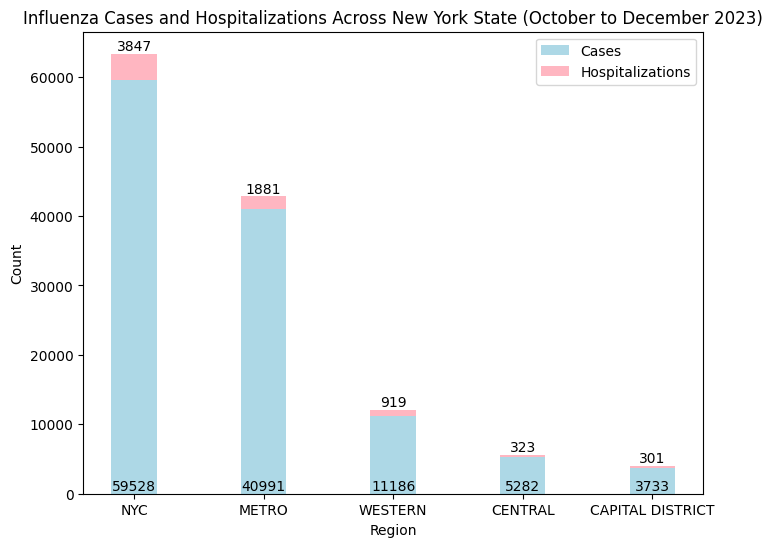

In [40]:
# Sort the DataFrame by total cases in descending order
sorted_region_flu_data = region_flu_data.sort_values(by='Case Count', ascending=False)

plt.figure(figsize=(8, 6))
bar_width = 0.35

regions = sorted_region_flu_data['Region']
cases = sorted_region_flu_data['Case Count']
hospitalizations = sorted_region_flu_data['Hospitalization Count']

bar1 = plt.bar(regions, cases, bar_width, label='Cases', color='#ADD8E6')
bar2 = plt.bar(regions, hospitalizations, bar_width, bottom=cases, label='Hospitalizations', color='#FFB6C1')

# Display counts at the bottom of the bars
for bar, count in zip(bar1, cases):
    plt.text(bar.get_x() + bar.get_width() / 2, 0, str(count), ha='center', va='bottom')

# Display counts on top of the hospitalization bars
for bar, count, height in zip(bar2, hospitalizations, bar1):
    plt.text(bar.get_x() + bar.get_width() / 2, height.get_height() + count, str(count), ha='center', va='bottom')

plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Influenza Cases and Hospitalizations Across New York State (October to December 2023)')
plt.legend()
plt.show()

###**Identify the county with the highest number of influenza cases.**

In [41]:
county_flu_cases_data = flu_data.groupby('County')['Case Count'].sum().reset_index()
highest_cases_county = county_flu_cases_data.loc[county_flu_cases_data['Case Count'].idxmax()]

print(f"County with the highest number of cases: {highest_cases_county['County']} - Cases: {highest_cases_county['Case Count']}")

County with the highest number of cases: QUEENS - Cases: 17762


###**Identify the county with the highest number of influenza hospitalizations.**

In [42]:
county_flu_hospitalizations_data = flu_data.groupby('County')['Hospitalization Count'].sum().reset_index()
highest_hospitalizations_county = county_flu_hospitalizations_data.loc[county_flu_hospitalizations_data['Hospitalization Count'].idxmax()]

print(f"County with the highest number of hospitalizations: {highest_hospitalizations_county['County']} - Hospitalizations: {highest_hospitalizations_county['Hospitalization Count']}")

County with the highest number of hospitalizations: KINGS - Hospitalizations: 999


###**Analyze the trend of cases and hospitalizations over different CDC weeks.**

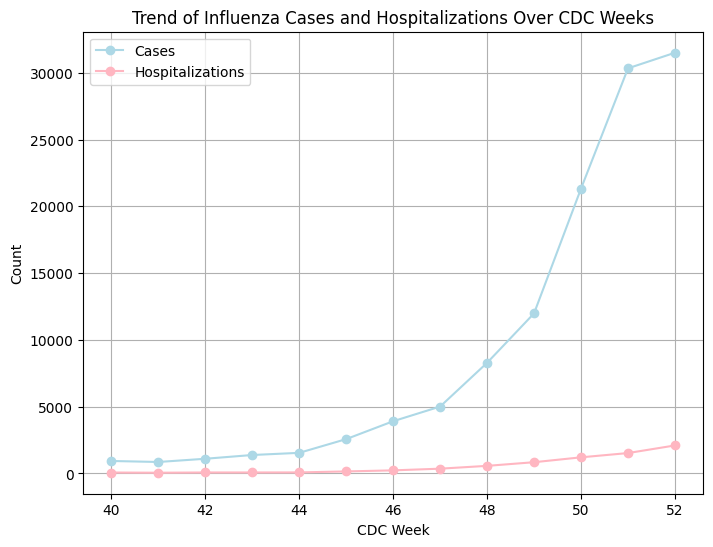

In [43]:
# Group by 'CDC Week' and calculate the sum of case counts and hospitalization counts
flu_cases_hospitalizations_by_week = flu_data.groupby('CDC Week').agg({'Case Count': 'sum', 'Hospitalization Count': 'sum'}).reset_index()

plt.figure(figsize=(8, 6))

plt.plot(flu_cases_hospitalizations_by_week['CDC Week'], flu_cases_hospitalizations_by_week['Case Count'], label='Cases', marker='o', color='#ADD8E6')
plt.plot(flu_cases_hospitalizations_by_week['CDC Week'], flu_cases_hospitalizations_by_week['Hospitalization Count'], label='Hospitalizations', marker='o', color='#FFB6C1')

plt.xlabel('CDC Week')
plt.ylabel('Count')
plt.title('Trend of Influenza Cases and Hospitalizations Over CDC Weeks')
plt.legend()
plt.grid(True)
plt.show()

###**Identify the week with the greatest spike and the greatest drop in the number of influenza cases.**

In [44]:
# Group by 'CDC Week' and calculate the sum of case counts
flu_cases_by_week = flu_data.groupby('CDC Week')['Case Count'].sum().reset_index()

# Calculate the week-to-week difference in case counts
flu_cases_by_week['Case Count Difference'] = flu_cases_by_week['Case Count'].diff()

# Identify the CDC week with the greatest spike
max_spike_week = flu_cases_by_week.loc[flu_cases_by_week['Case Count Difference'].idxmax(), 'CDC Week']
max_spike_value = flu_cases_by_week['Case Count Difference'].max()

# Identify the CDC week with the greatest drop
max_drop_week = flu_cases_by_week.loc[flu_cases_by_week['Case Count Difference'].idxmin(), 'CDC Week']
max_drop_value = flu_cases_by_week['Case Count Difference'].min()

print("CDC Week with the greatest spike:")
print(f"Week: {max_spike_week}, Spike: {max_spike_value}")

print("\nCDC Week with the greatest drop:")
print(f"Week: {max_drop_week}, Drop: {max_drop_value}")

CDC Week with the greatest spike:
Week: 50, Spike: 9344.0

CDC Week with the greatest drop:
Week: 41, Drop: -76.0


In [45]:
flu_cases_by_week

,CDC Week,Case Count,Case Count Difference
0,40,930,NaN
1,41,854,-76.0
2,42,1096,242.0
3,43,1377,281.0
4,44,1539,162.0
5,45,2567,1028.0
6,46,3907,1340.0
7,47,5005,1098.0
8,48,8282,3277.0
9,49,11987,3705.0


###**Identify the week with the greatest and lowest number of influenza hospitalizations.**

In [46]:
# Group by 'CDC Week' and calculate the sum of hospitalization counts
flu_hospitalizations_by_week = flu_data.groupby('CDC Week')['Hospitalization Count'].sum().reset_index()

# Calculate the week-to-week difference in hospitalization counts
flu_hospitalizations_by_week['Hospitalization Count Difference'] = flu_hospitalizations_by_week['Hospitalization Count'].diff()

# Identify the CDC week with the greatest hospitalization count
max_hospitalization_week = flu_hospitalizations_by_week.loc[flu_hospitalizations_by_week['Hospitalization Count'].idxmax(), 'CDC Week']
max_hospitalization_value = flu_hospitalizations_by_week['Hospitalization Count'].max()

# Identify the CDC week with the lowest hospitalization count
min_hospitalization_week = flu_hospitalizations_by_week.loc[flu_hospitalizations_by_week['Hospitalization Count'].idxmin(), 'CDC Week']
min_hospitalization_value = flu_hospitalizations_by_week['Hospitalization Count'].min()

print("CDC Week with the greatest hospitalization count:")
print(f"Week: {max_hospitalization_week}, Hospitalization Count: {max_hospitalization_value}")

print("\nCDC Week with the lowest hospitalization count:")
print(f"Week: {min_hospitalization_week}, Hospitalization Count: {min_hospitalization_value}")

CDC Week with the greatest hospitalization count:
Week: 52, Hospitalization Count: 2093

CDC Week with the lowest hospitalization count:
Week: 41, Hospitalization Count: 50


In [47]:
flu_hospitalizations_by_week

,CDC Week,Hospitalization Count,Hospitalization Count Difference
0,40,65,NaN
1,41,50,-15.0
2,42,68,18.0
3,43,69,1.0
4,44,73,4.0
5,45,147,74.0
6,46,226,79.0
7,47,353,127.0
8,48,564,211.0
9,49,837,273.0


###**Which age group had the highest total number of cases, and which age group had the highest total number of hospitalizations?**

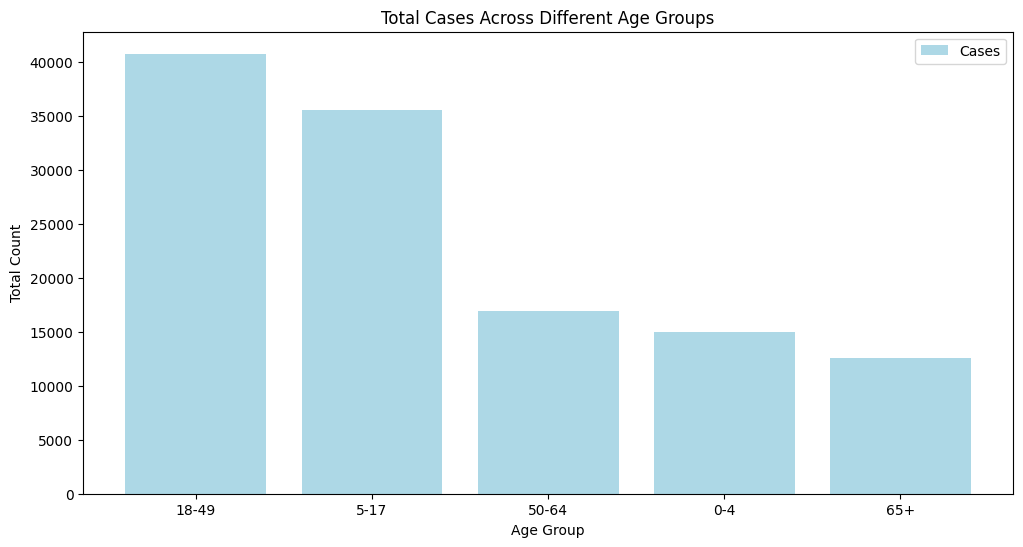

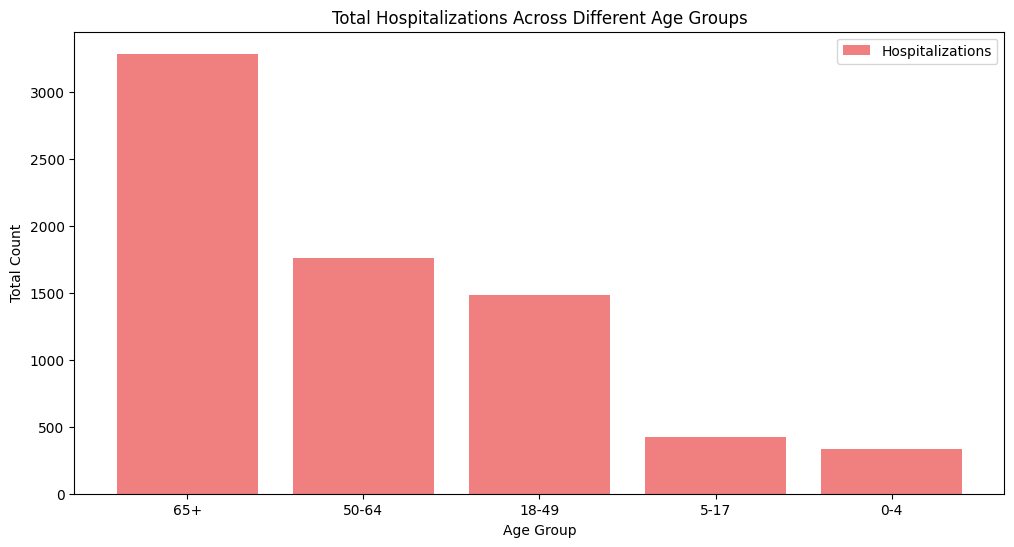

In [48]:
# Group by 'Age Group' and calculate the sum of case counts and hospitalization counts
age_group_data = flu_data.groupby('Age Group').agg({'Case Count': 'sum', 'Hospitalization Count': 'sum'}).reset_index()

# Sort by total cases in descending order
age_group_sorted_by_cases = age_group_data.sort_values(by='Case Count', ascending=False)

plt.figure(figsize=(12, 6))

# Plot total cases
plt.bar(age_group_sorted_by_cases['Age Group'], age_group_sorted_by_cases['Case Count'], label='Cases', color='lightblue')

plt.xlabel('Age Group')
plt.ylabel('Total Count')
plt.title('Total Cases Across Different Age Groups')
plt.legend()
plt.show()

# Sort by total hospitalizations in descending order
age_group_sorted_by_hosp = age_group_data.sort_values(by='Hospitalization Count', ascending=False)

plt.figure(figsize=(12, 6))

# Plot total hospitalizations
plt.bar(age_group_sorted_by_hosp['Age Group'], age_group_sorted_by_hosp['Hospitalization Count'], label='Hospitalizations', color='lightcoral')

plt.xlabel('Age Group')
plt.ylabel('Total Count')
plt.title('Total Hospitalizations Across Different Age Groups')
plt.legend()
plt.show()


###**Determine the age group most affected by influenza and identify whether specific age groups demonstrate a higher hospitalization rate relative to their case count.**

In [49]:
# Calculate the hospitalization rate per age group
age_group_data['Hospitalization Rate'] = age_group_data['Hospitalization Count'] / age_group_data['Case Count']

# Identify the age group with the highest hospitalization rate
most_affected_age_group = age_group_data.loc[age_group_data['Hospitalization Rate'].idxmax(), 'Age Group']
highest_hospitalization_rate = age_group_data['Hospitalization Rate'].max()

print("Age Group most affected by influenza:")
print(f"Most affected Age Group: {most_affected_age_group}")
print(f"Highest Hospitalization Rate: {highest_hospitalization_rate}")

Age Group most affected by influenza:
Most affected Age Group: 65+
Highest Hospitalization Rate: 0.2615519439133206


In [50]:
age_group_data

,Age Group,Case Count,Hospitalization Count,Hospitalization Rate
0,0-4,14933,331,0.022166
1,18-49,40744,1480,0.036324
2,5-17,35578,421,0.011833
3,50-64,16913,1756,0.103825
4,65+,12552,3283,0.261552


##**Conclusion:**

In conclusion, the influenza data analysis for the period from October 1, 2023, to December 30, 2023, provides valuable insights into the impact of the outbreak in New York State. The total cases recorded during this period reached 120,720, with a weekly average of 9,286 cases. The total hospitalizations amounted to 7,271, averaging 559 per week. Notably, the NYC region emerged as the epicenter, reporting the highest number of cases at 59,528 and the highest hospitalization count at 3,847. Among the counties, Queens County led in total cases with 17,762, while Kings County recorded the highest number of influenza hospitalizations at 999.

The analysis revealed a consistent upward trend in both cases and hospitalizations over the weeks, with Week 50 witnessing the greatest spike in cases at 9,344. Conversely, Week 41 experienced a notable drop with 76 fewer cases than the preceding week. The culmination of the analysis highlighted Week 52 as the period with the highest hospitalization count, reaching 2,093 cases, while Week 41 had the lowest count at 50 hospitalizations.

Breaking down the data by age group, the 18-49 age group emerged with the most total cases, while the 65+ age group had the highest hospitalization count. Significantly, the 65+ age group proved to be the most affected by influenza, displaying the highest hospitalization rate.


##**Recommendations:**


*   Develop targeted campaigns, especially in the NYC region, to promote influenza prevention, vaccination, and early detection.
*   Strategically allocate resources, focusing on regions and age groups with the highest case and hospitalization counts.
*   Engage communities with clear information about influenza risks, preventive measures, and recognizing early symptoms.
*   Encourage vaccination, particularly among age groups with high hospitalization rates.


